In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import convolve2d
from IPython.display import display, Math, Latex
from PIL import Image, ImageFilter
import os, os.path
import glob
from copy import deepcopy, copy
from skimage import color, io
from skimage.transform import resize

# The Visual Machinery of the human Brain

# Introduction
In this lab we will explore different edge detection algorithm to mimic the behavoir of simple cells. 

# Method
We will be using black and white images as this will be making it simpler and will not really affect our algorithm. Then we will convolve it with different version of Kirsch or Sobel operator. So we will be filtering the images and then pass it through a threshold algorithm that will mimic the behavior of simple cells. 

In [2]:
def kirsch(img_1):
    K_0 = [[5,5,5],[-3,0,-3],[-3,-3,-3]]
    K_1 = [[-3,5,5],[-3,0,5],[-3,-3,-3]]
    K_2 = [[-3,-3,5],[-3,0,5],[-3,-3,5]]
    K_3 = [[-3,-3,-3],[-3,0,5],[-3,5,5]]
    K_4 = [[-3,-3,-3],[-3,0,-3],[5,5,5]]
    K_5 = [[-3,-3,-3],[5,0,-3],[5,5,-3]]
    K_6 = [[5,-3,-3],[5,0,-3],[5,-3,-3]]
    K_7 = [[5,5,-3],[5,0,-3],[-3,-3,-3]]
    
    filt0 = abs(convolve2d(img_1,K_0,mode='same'))
    filt1 = abs(convolve2d(img_1,K_1,mode='same'))
    filt2 = abs(convolve2d(img_1,K_2,mode='same'))
    filt3 = abs(convolve2d(img_1,K_3,mode='same'))
    filt4 = abs(convolve2d(img_1,K_4,mode='same'))
    filt5 = abs(convolve2d(img_1,K_5,mode='same'))
    filt6 = abs(convolve2d(img_1,K_6,mode='same'))
    filt7 = abs(convolve2d(img_1,K_7,mode='same'))
    
    res = filt5
    th = 0.5
    th_1 = thresholding(res,th*1)
    th_2 = thresholding(res,th*2)
    th_3 = thresholding(res,th*3)
    th_4 = thresholding(res,th*4)
    th_5 = thresholding(res,th*5)
    show(res,th_1,th_2,th_3,th_4,th_5,th)

In [3]:
def sobel(img_1):
    hz = convolve2d(img_1,sobel_horizontal,mode='same')
    vert = convolve2d(img_1,sobel_vertical,mode='same')
    res = np.sqrt(hz**2 + vert**2)
    th = 0.2
    th_1 = thresholding(res,th)
    th_2 = thresholding(res,th*2)
    th_3 = thresholding(res,th*3)
    th_4 = thresholding(res,th*4)
    th_5 = thresholding(res,th*5)
    show(res,th_1,th_2,th_3,th_4,th_5,th)

In [4]:
def show(o_img,th_1,th_2,th_3,th_4,th_5,th):
    fig = plt.figure()
    fig.set_figheight(15)
    fig.set_figwidth(15)
    fig.add_subplot(2,3,1)
    plt.imshow(o_img, cmap='gray')
    plt.title("Pre-Threshold")
    # display the new image
    fig.add_subplot(2,3,2)
    plt.imshow(th_1, cmap='gray')
    plt.title("Threshold = " + str(th))
    fig.add_subplot(2,3,3)
    plt.imshow(th_2, cmap='gray')
    plt.title("Threshold= " + str(th*2))
    fig.add_subplot(2,3,4)
    plt.imshow(th_3, cmap='gray')

    plt.title("Threshold= " + str(th*3))
    fig.add_subplot(2,3,5)
    plt.imshow(th_4, cmap='gray')
    plt.title("Threshold= " + str(th*4))
    fig.add_subplot(2,3,6)
    plt.imshow(th_5, cmap='gray')
    plt.title("Threshold= " + str(th*5))
    plt.show(block=True)

In [5]:
def thresholding(img,threshold= 100):
    k = np.zeros_like(img)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if (img[i][j] < threshold):
                k[i][j] = 0
            else:
                k[i][j] = 255
    return np.array(k)

In [6]:
ima = []
for filename in glob.glob('Images/*.jpg'): #assuming gif
    img = color.rgb2gray(io.imread(filename))
    img = resize(img, (256, 256), anti_aliasing=True)
    ima.append(img)

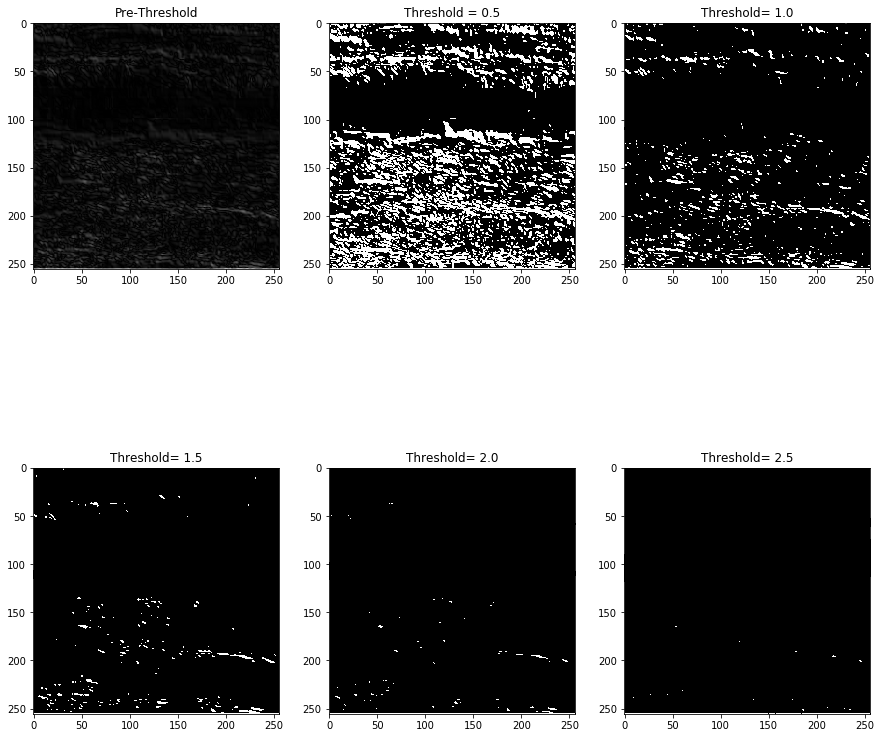

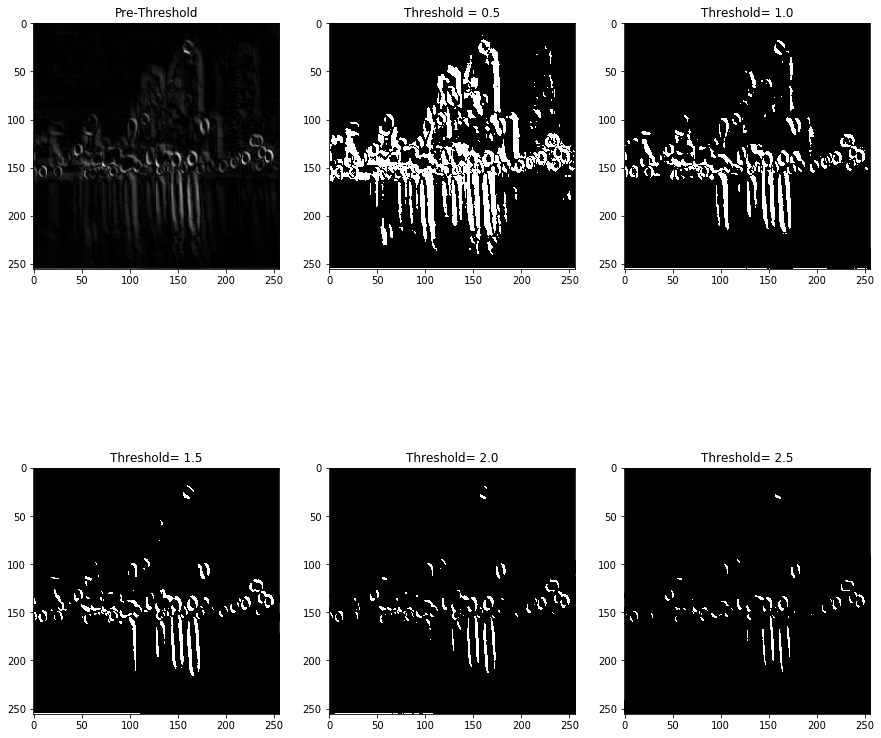

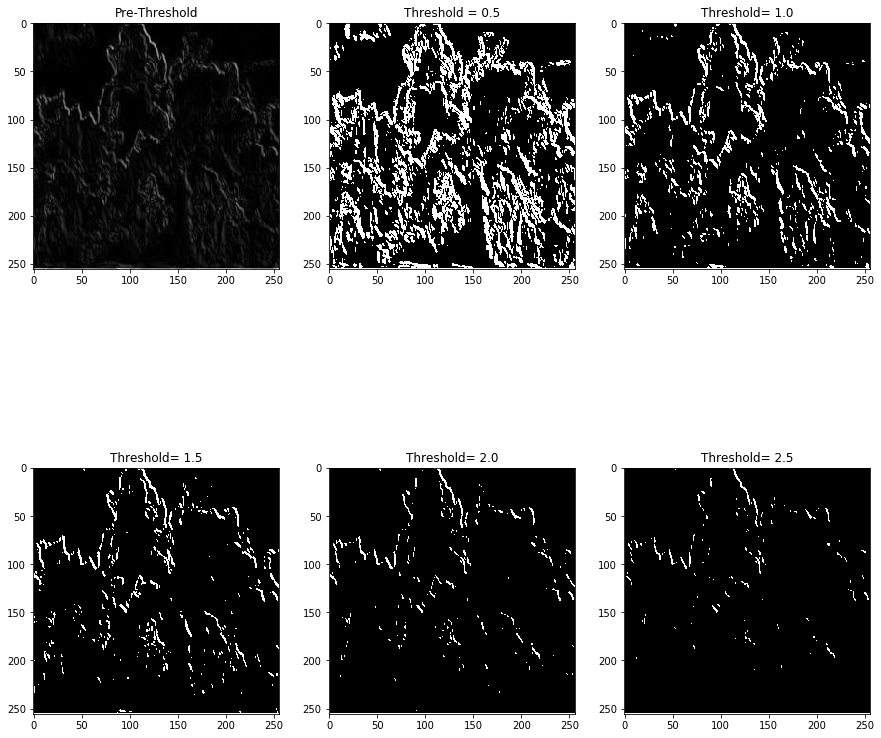

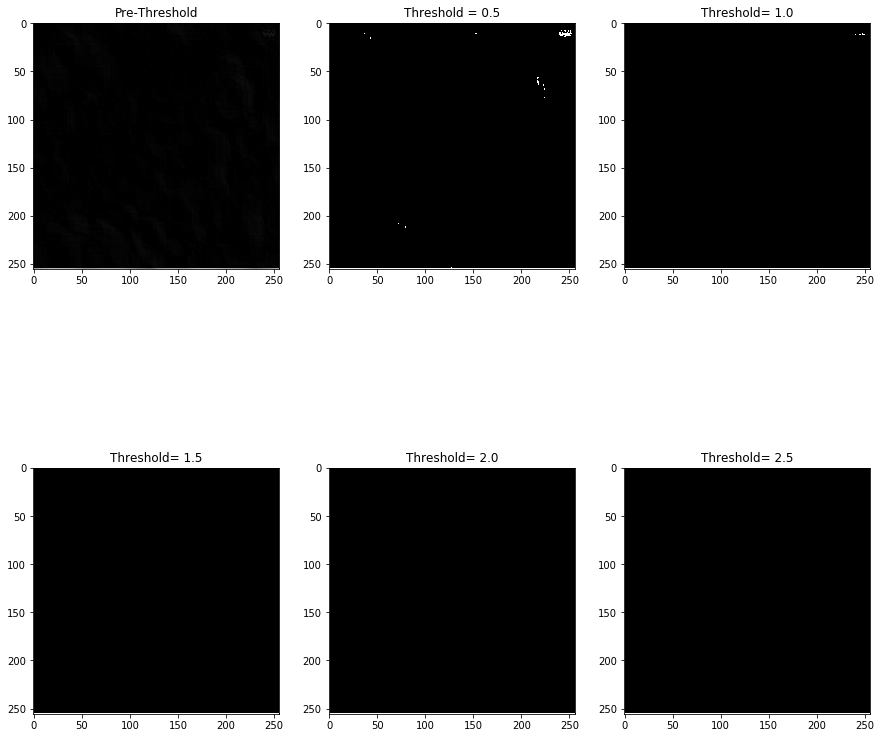

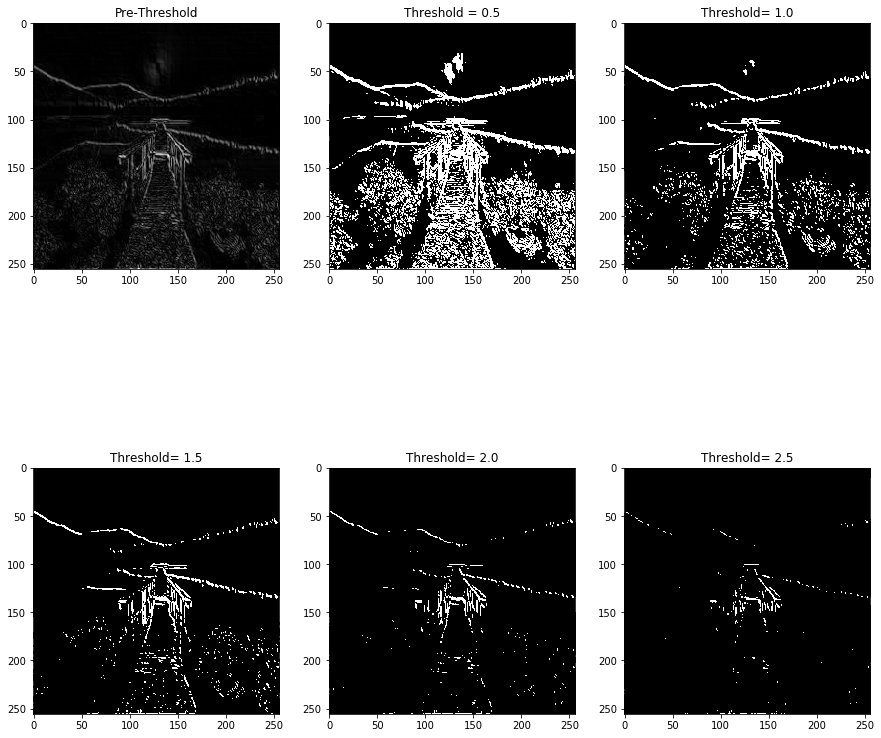

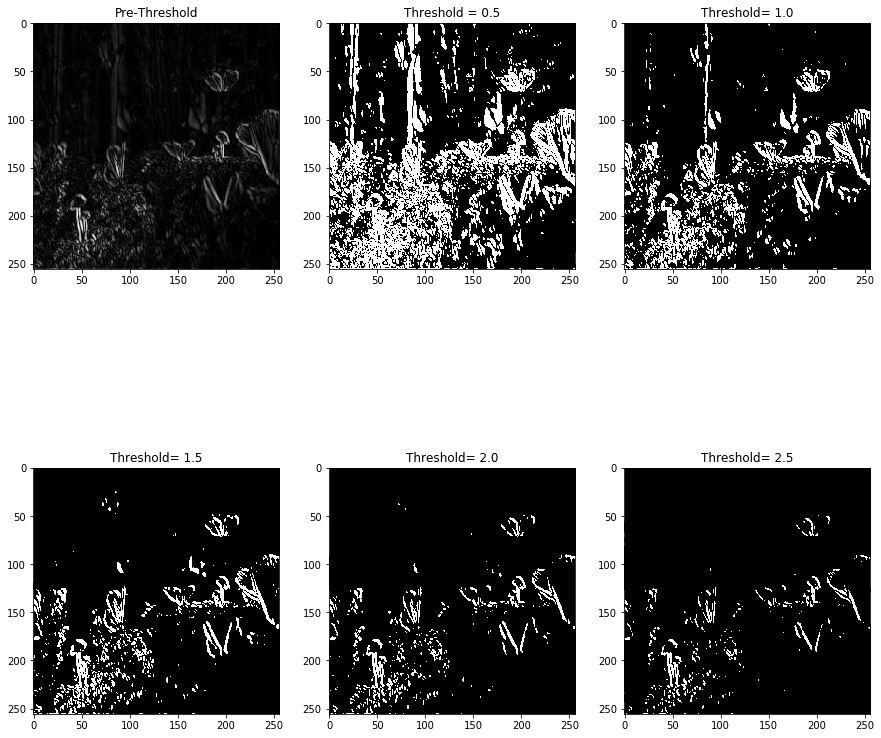

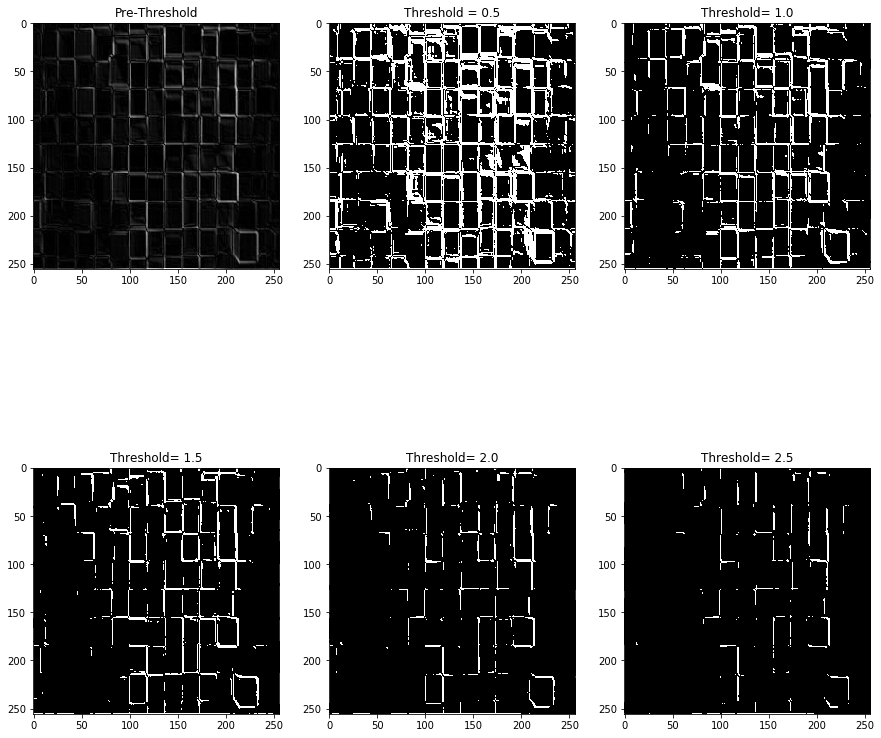

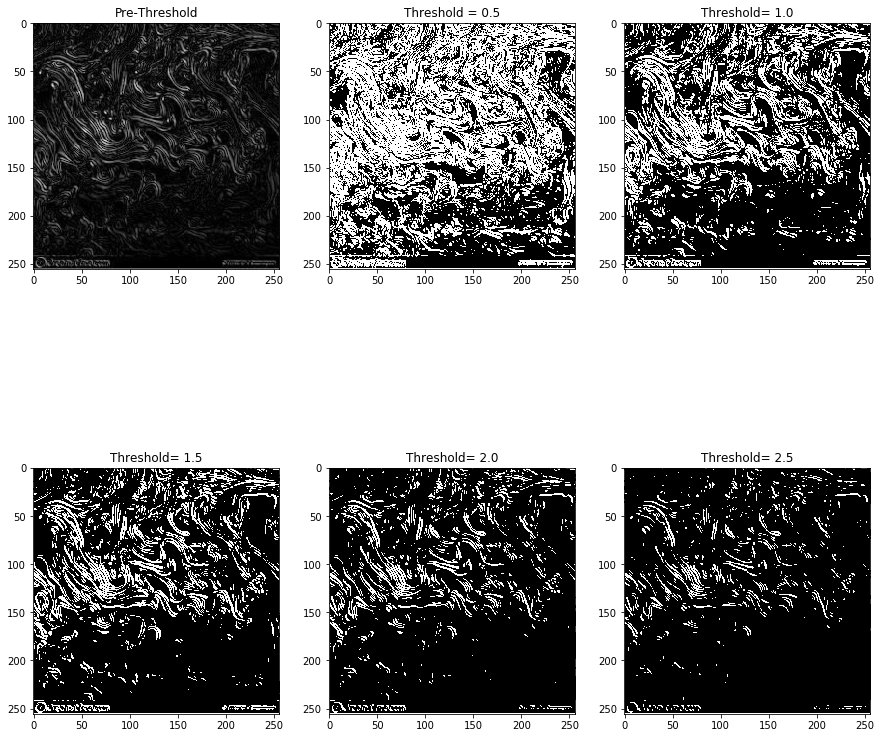

In [7]:
for i in range(len(ima)):
    kirsch(ima[i])

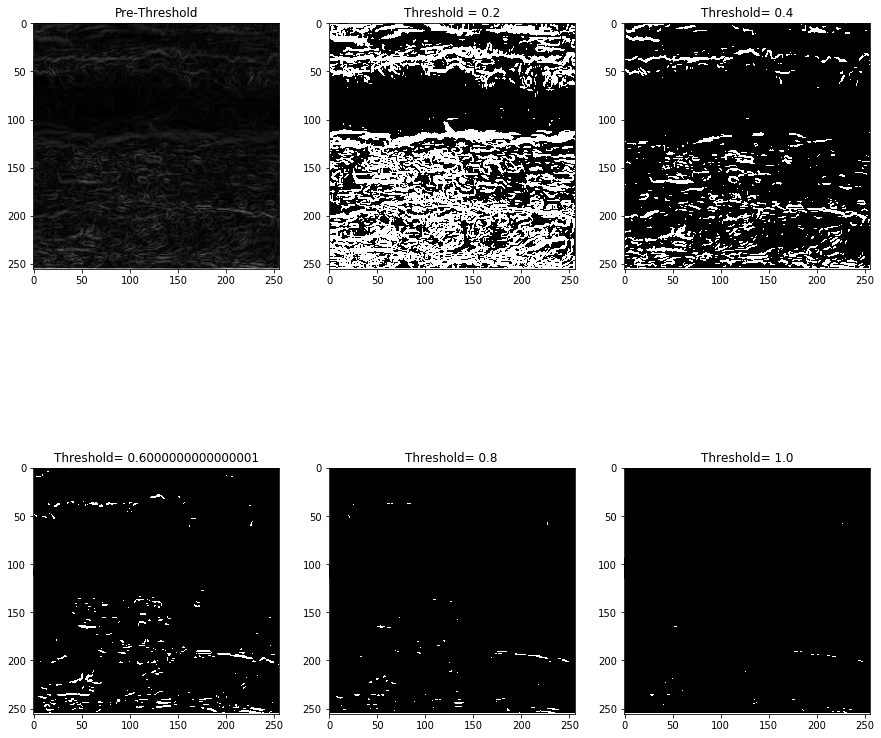

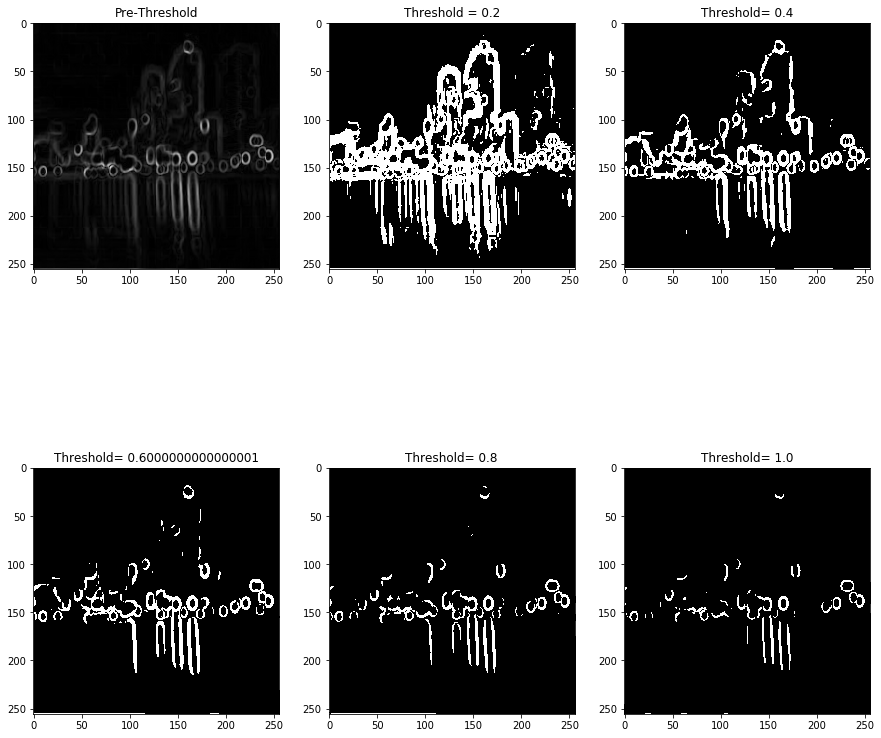

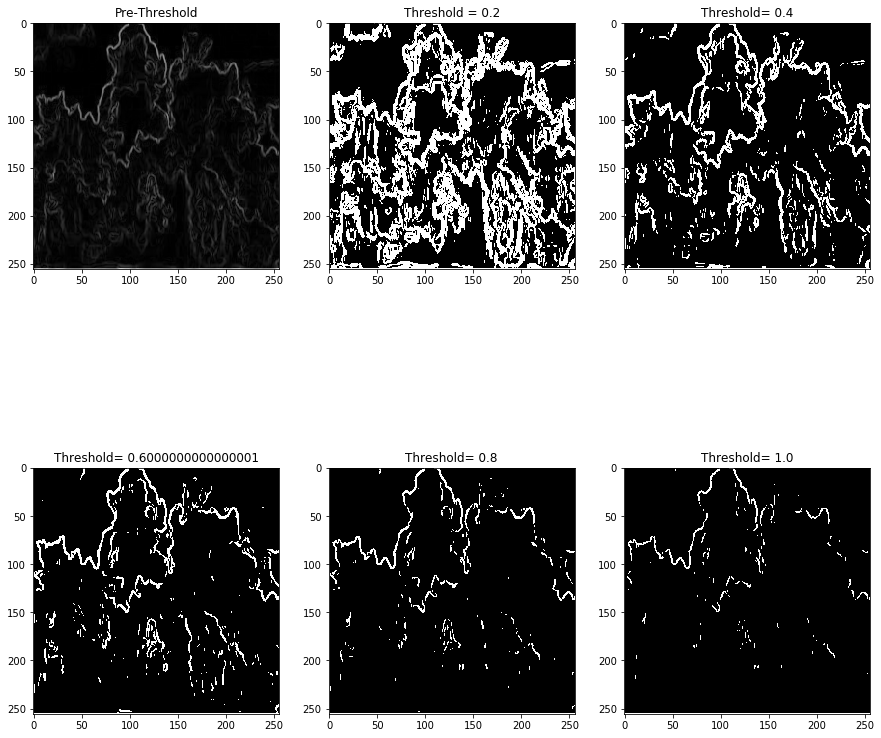

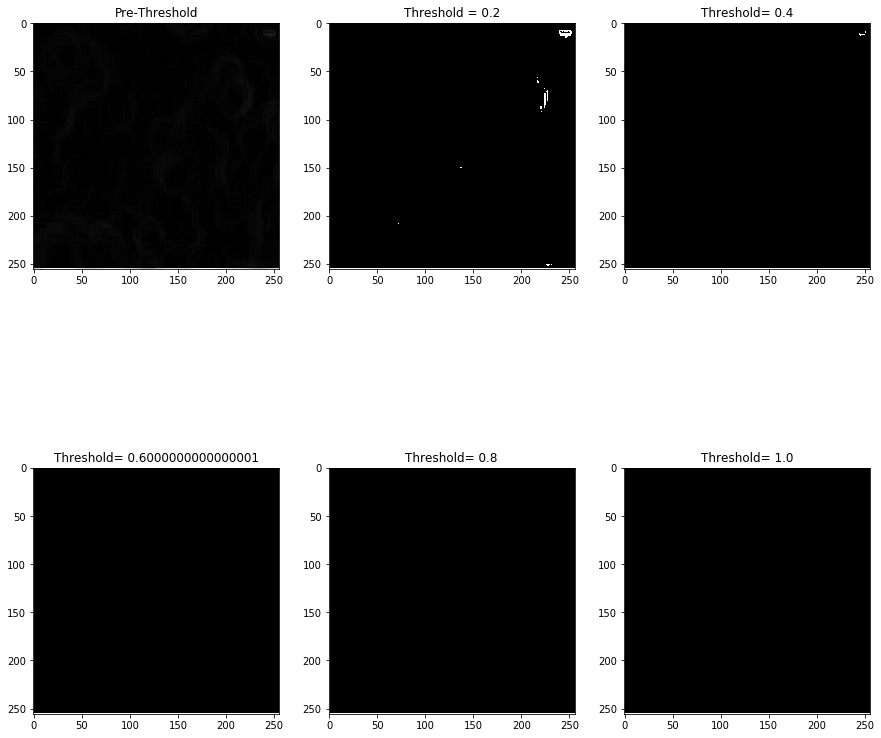

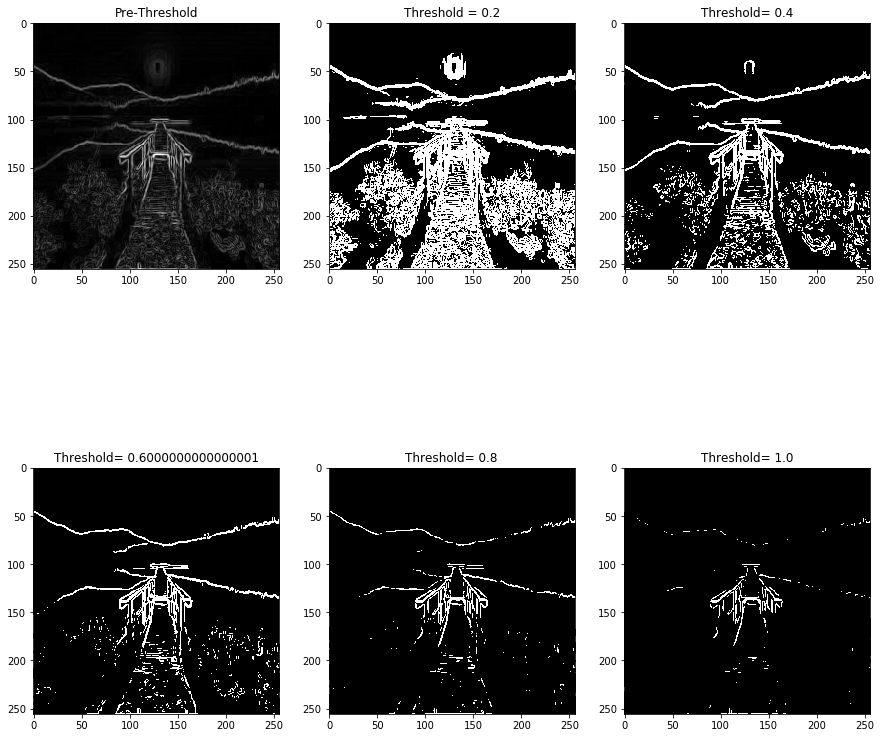

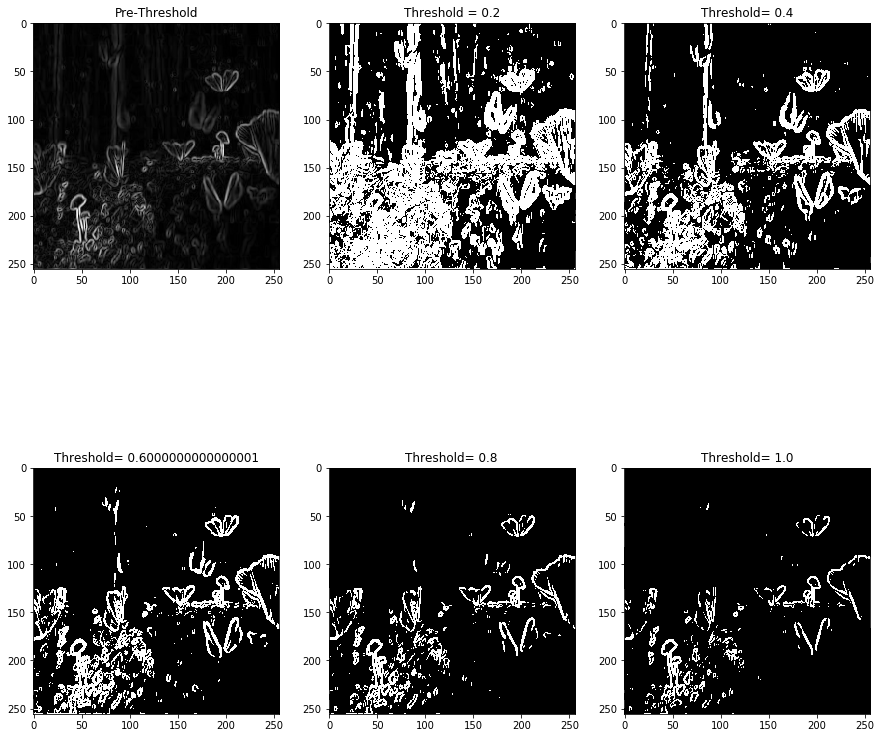

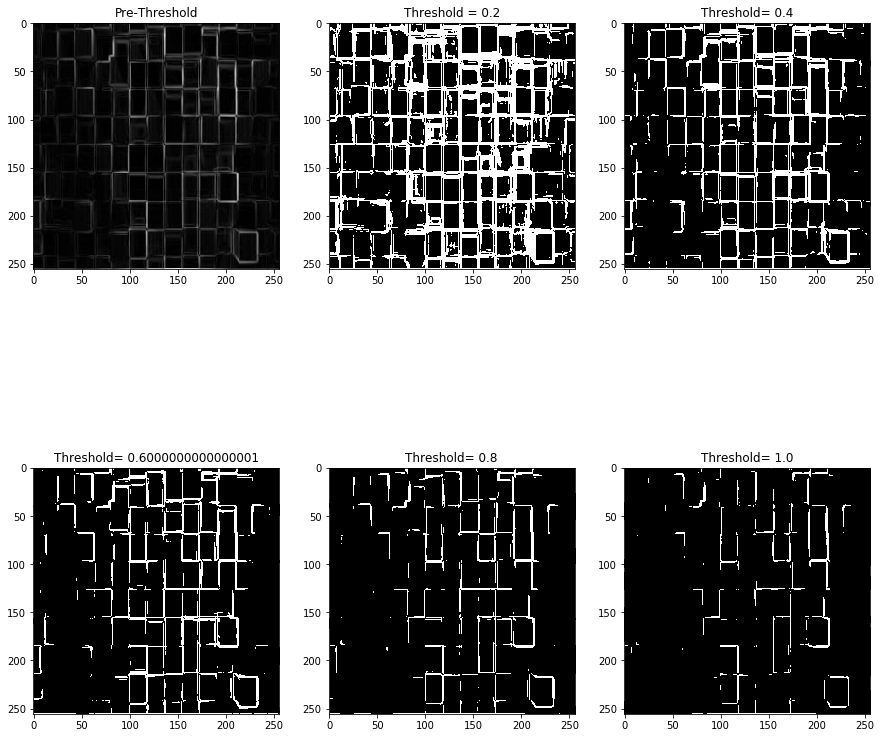

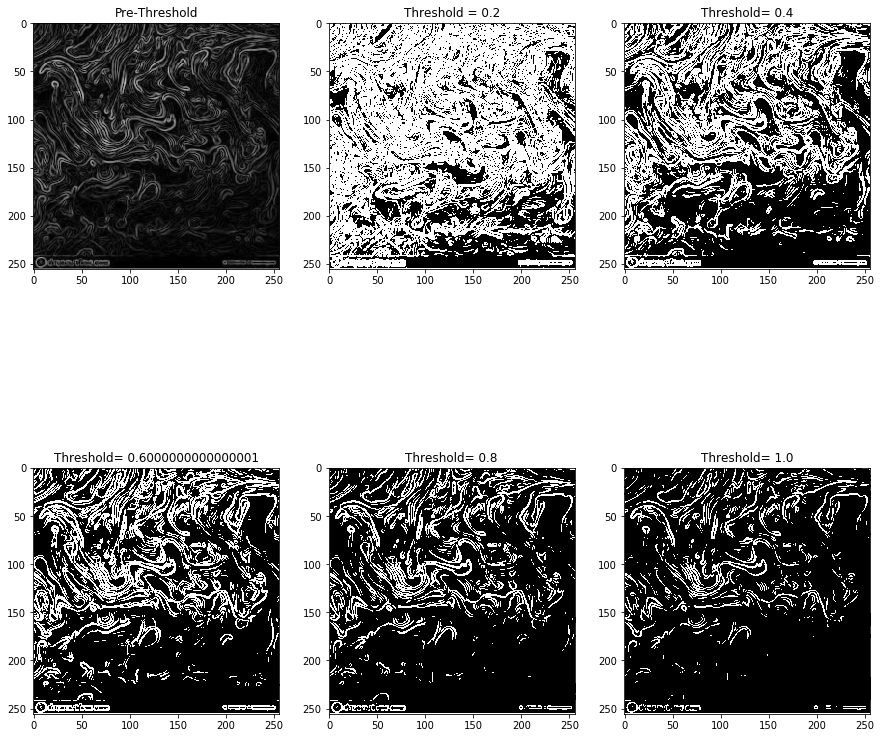

In [8]:
sobel_horizontal = [[-1,-2,-1],[0,0,0],[1,2,1]]
sobel_vertical = [[-1,0,1],[-2,0,2],[-1,0,1]]
for i in range(len(ima)):
    sobel(ima[i])